- let's get into the Scikit-learn implementation examples for Agglomerative Hierarchical Clustering.
- We'll do two examples using different datasets to illustrate how it works and how to interpret dendrograms.

- **Important Note:** Hierarchical clustering, especially when using distance-based linkage methods, is sensitive to feature scales. Feature scaling (e.g., using StandardScaler) is generally recommended.

#### Example 1: Hierarchical Clustering on Synthetic make_blobs Data

This example uses make_blobs to generate data with clear cluster structures. We will focus on visualizing the dendrogram and seeing how different linkage criteria affect the clustering hierarchy.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc # For dendrogram plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- 1. Generate Synthetic Data with Clear Clusters ---
n_samples = 150
n_features = 2
n_clusters_true = 3 # True number of clusters
random_state = 42

X_blobs, y_blobs_true = make_blobs(n_samples=n_samples,
                                   n_features=n_features,
                                   centers=n_clusters_true,
                                   cluster_std=1.0,
                                   random_state=random_state)

X_blobs_df = pd.DataFrame(X_blobs, columns=['Feature_1', 'Feature_2'])
print("Synthetic 'make_blobs' Dataset Generated for Hierarchical Clustering.")
print(f"Features shape: {X_blobs_df.shape}")


Synthetic 'make_blobs' Dataset Generated for Hierarchical Clustering.
Features shape: (150, 2)


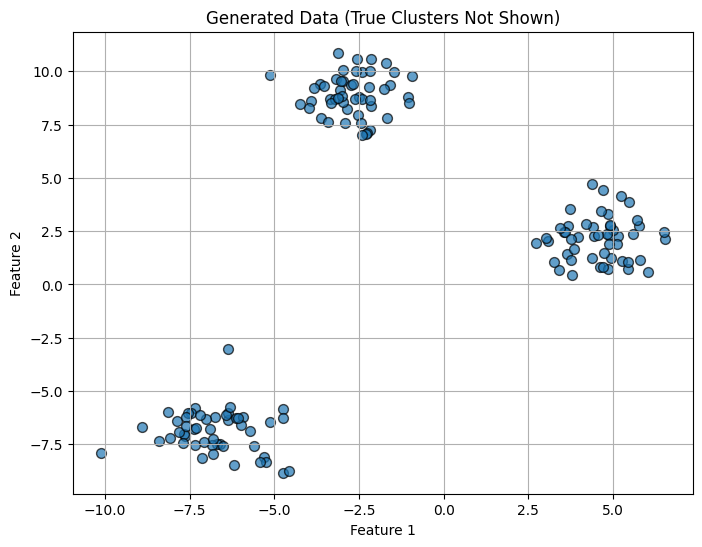

In [3]:
# Visualize the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X_blobs_df['Feature_1'], X_blobs_df['Feature_2'], s=50, alpha=0.7, edgecolors='k')
plt.title("Generated Data (True Clusters Not Shown)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [4]:
# --- 2. Feature Scaling ---
scaler_blobs = StandardScaler()
X_blobs_scaled = scaler_blobs.fit_transform(X_blobs_df)
print("\nData Scaled.")


Data Scaled.


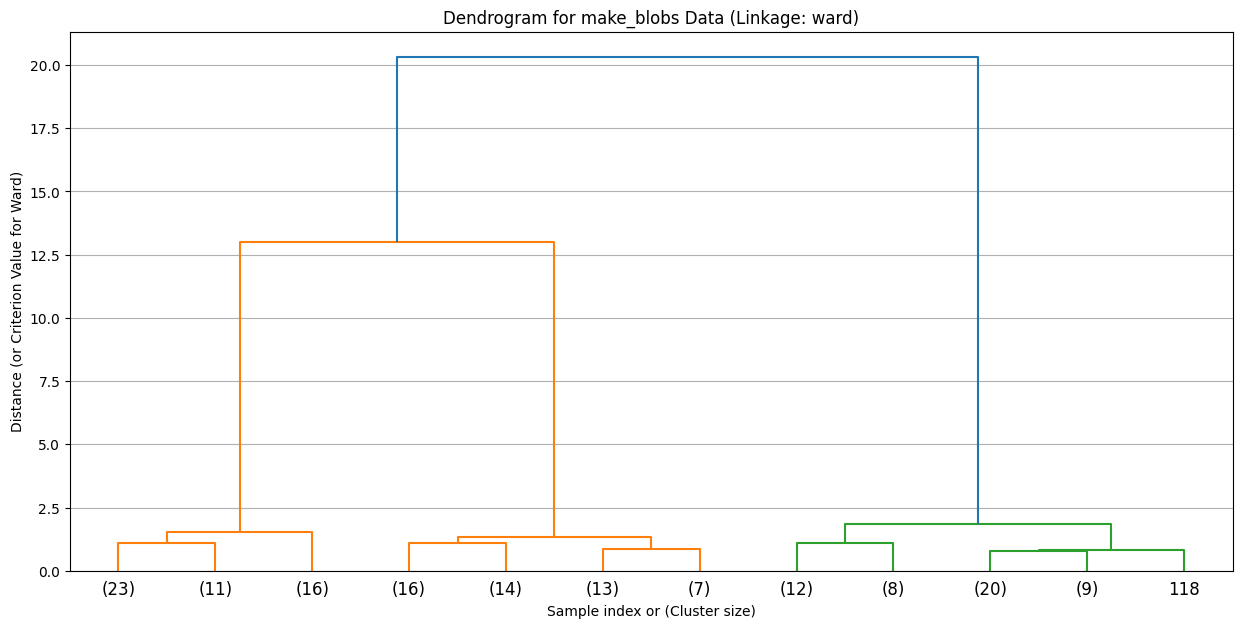

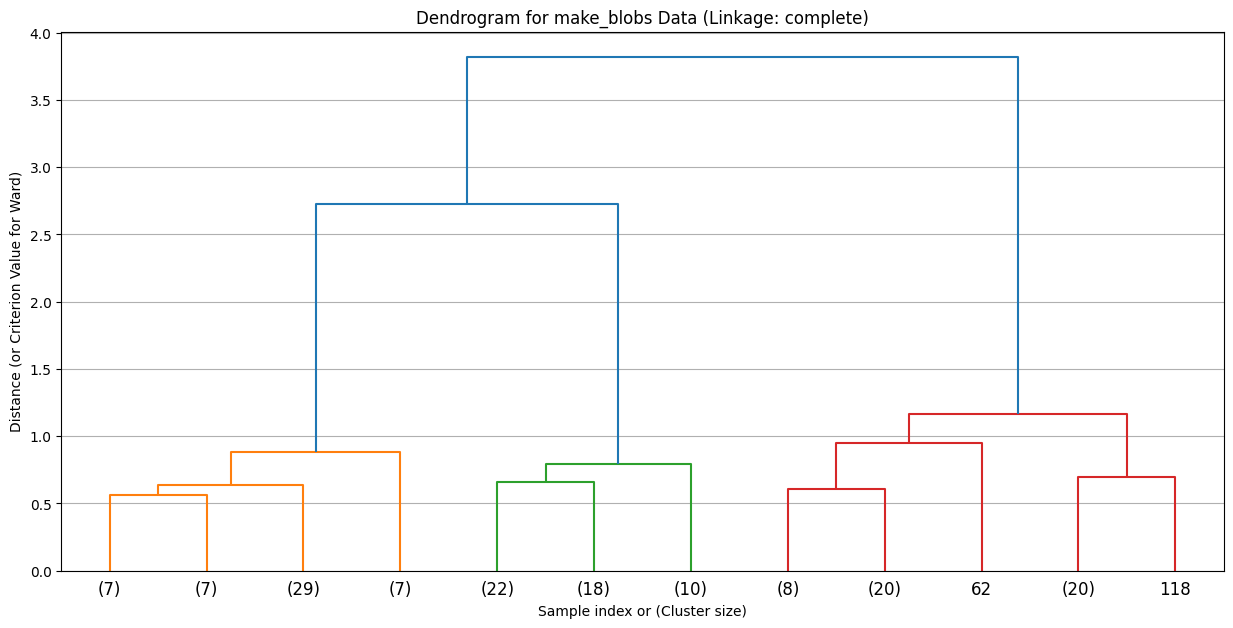

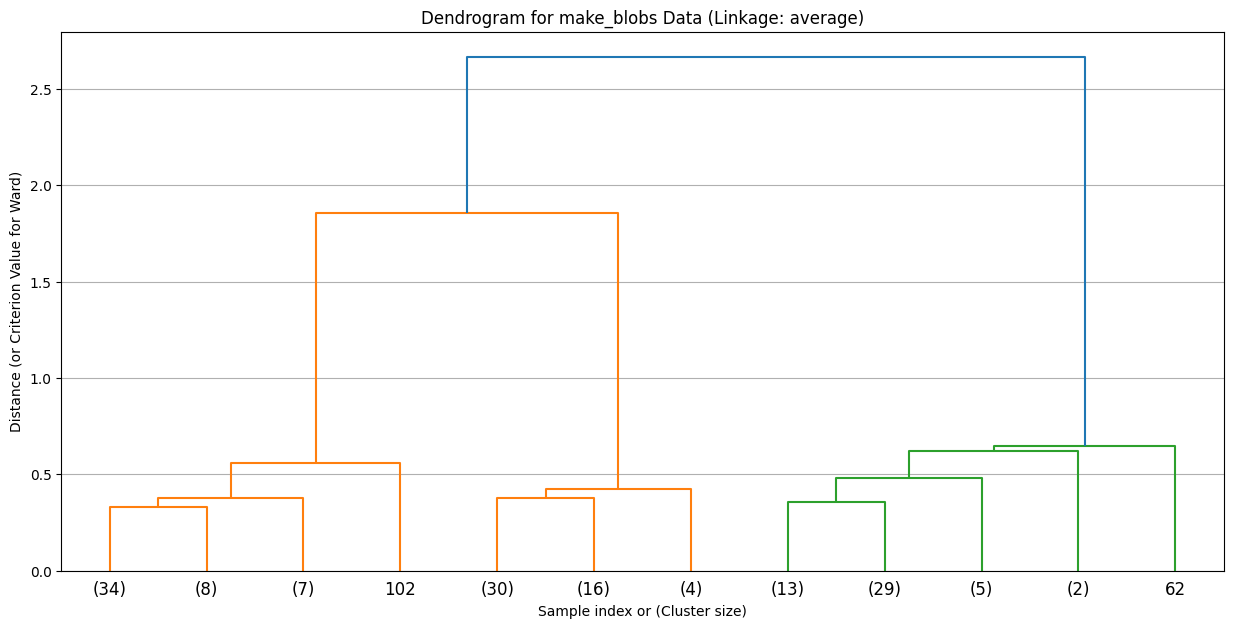

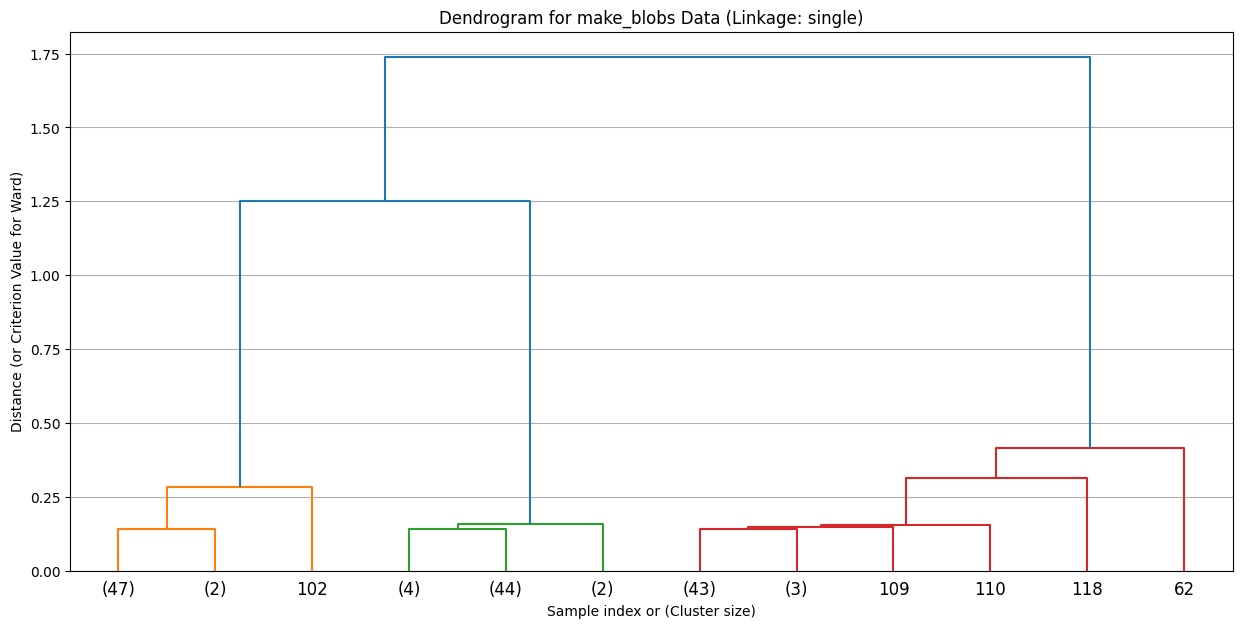

In [5]:
# --- 3. Plotting Dendrograms for Different Linkage Methods ---
linkage_methods = ['ward', 'complete', 'average', 'single']

for method in linkage_methods:
    plt.figure(figsize=(15, 7))
    plt.title(f"Dendrogram for make_blobs Data (Linkage: {method})")
    
    # The linkage function from scipy.cluster.hierarchy performs the hierarchical clustering
    # and returns the linkage matrix.
    # 'ward' linkage minimizes the variance of the clusters being merged.
    # 'complete' uses the maximum distances between observations of two sets.
    # 'average' uses the average of the distances between observations of two sets.
    # 'single' uses the minimum of the distances between observations of two sets.
    linked_matrix = shc.linkage(X_blobs_scaled, method=method)
    
    dendrogram = shc.dendrogram(linked_matrix,
                                orientation='top',
                                distance_sort='descending',
                                show_leaf_counts=True,
                                truncate_mode='lastp', # Show only the last p merged clusters
                                p=12) # Number of merged clusters to show at the bottom
    plt.xlabel("Sample index or (Cluster size)")
    plt.ylabel("Distance (or Criterion Value for Ward)")
    plt.grid(axis='y')
    plt.show()

In [9]:
# --- 4. Applying Agglomerative Clustering with a Chosen Number of Clusters ---
# Based on the dendrograms (especially 'ward' or 'average'), K=3 seems appropriate.
n_clusters_chosen = 3 
linkage_chosen = 'ward' # Ward often gives good results for globular clusters

print(f"\n--- Applying Agglomerative Clustering with K={n_clusters_chosen} and Linkage='{linkage_chosen}' ---")

# AgglomerativeClustering parameters:
#   n_clusters: The number of clusters to find. Must be None if distance_threshold is not None.
#   affinity: Metric used to compute linkage. Can be "euclidean", "l1", "l2", "manhattan", "cosine".
#             Default is "euclidean".
#   linkage: Which linkage criterion to use.
#   distance_threshold: The linkage distance threshold above which, clusters will not be merged.
#                       If not None, n_clusters must be None.

agg_clustering_blobs = AgglomerativeClustering(
    n_clusters=n_clusters_chosen,
     metric='euclidean', # Default, explicit here
    linkage=linkage_chosen
)
cluster_labels_blobs = agg_clustering_blobs.fit_predict(X_blobs_scaled)

# Add cluster labels to the DataFrame
X_blobs_df['Hierarchical_Cluster'] = cluster_labels_blobs


--- Applying Agglomerative Clustering with K=3 and Linkage='ward' ---


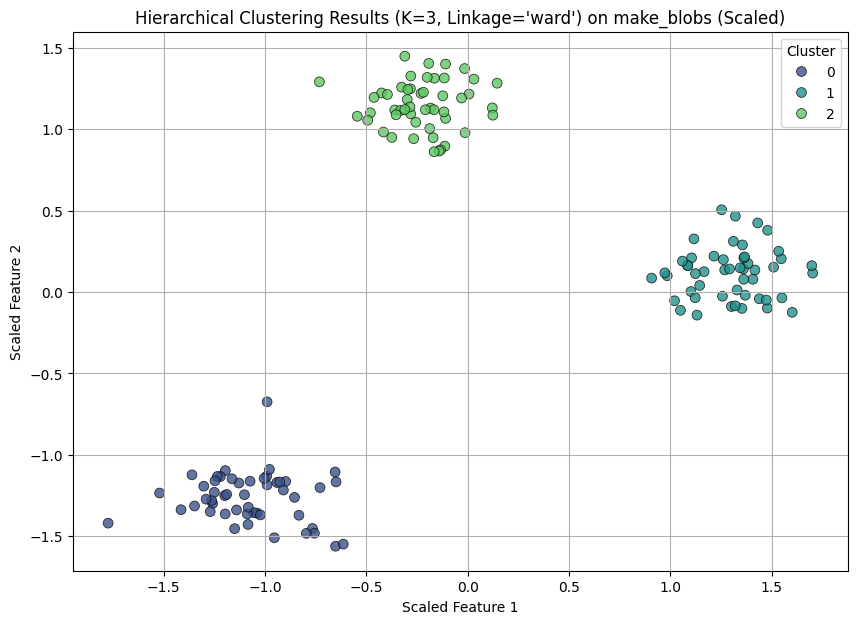


Adjusted Rand Index (vs true labels): 1.0000


In [10]:
# --- 5. Visualize the Clustering Results ---
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_blobs_scaled[:, 0], y=X_blobs_scaled[:, 1], hue=cluster_labels_blobs,
                palette=sns.color_palette("viridis", n_colors=n_clusters_chosen),
                s=50, alpha=0.8, legend='full', edgecolor='k')

plt.title(f"Hierarchical Clustering Results (K={n_clusters_chosen}, Linkage='{linkage_chosen}') on make_blobs (Scaled)")
plt.xlabel("Scaled Feature 1")
plt.ylabel("Scaled Feature 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Compare with true labels (if available)
from sklearn.metrics import adjusted_rand_score
ari_blobs_hc = adjusted_rand_score(y_blobs_true, cluster_labels_blobs)
print(f"\nAdjusted Rand Index (vs true labels): {ari_blobs_hc:.4f}")


**Discussion for make_blobs Hierarchical Clustering Example:**

- Dendrograms: You will see different dendrogram structures based on the linkage method.
- 'ward' and 'average' linkage will likely produce balanced dendrograms that clearly suggest 3 clusters for this dataset.
- single linkage might show "chaining" behavior, where points are added one by one to existing clusters.
- complete linkage might form more compact, spherical clusters.
- Choosing K from Dendrogram: By observing the heights of the merges, you can decide where to "cut" the dendrogram. For this data, cutting at a level that results in 3 clusters should be evident.

- AgglomerativeClustering: Once you have an idea of K (or a distance threshold), you can use AgglomerativeClustering from Scikit-learn to get the cluster labels directly.
- The final scatter plot will show the data points colored by the clusters found by the hierarchical algorithm. For this dataset, it should closely match the true underlying clusters.


---
#### Example 2: Hierarchical Clustering on a Subset of the Wine Dataset

This example uses the Wine dataset, focusing on a few features to explore customer segmentation based on wine characteristics. We'll again visualize the dendrogram to help decide on the number of clusters.

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA # For visualization

In [12]:
# --- 1. Load Wine Dataset and Select Features ---
wine = load_wine()
# Using all features for clustering, but will use PCA for 2D visualization later
X_wine_full = wine.data
y_wine_true = wine.target # True origins of the wines (for potential comparison)
feature_names_wine = wine.feature_names

X_wine_df = pd.DataFrame(X_wine_full, columns=feature_names_wine)
print("Wine Dataset Loaded for Hierarchical Clustering.")
print(f"Features shape: {X_wine_df.shape}")
print(f"Number of true classes: {len(np.unique(y_wine_true))}") # There are 3 classes


Wine Dataset Loaded for Hierarchical Clustering.
Features shape: (178, 13)
Number of true classes: 3


In [13]:
# --- 2. Feature Scaling ---
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine_df)
print("\nWine Data Scaled.")



Wine Data Scaled.



--- Plotting Dendrogram for Wine Data (Ward Linkage) ---


C:\Users\king\AppData\Local\Temp\ipykernel_19040\1000601969.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


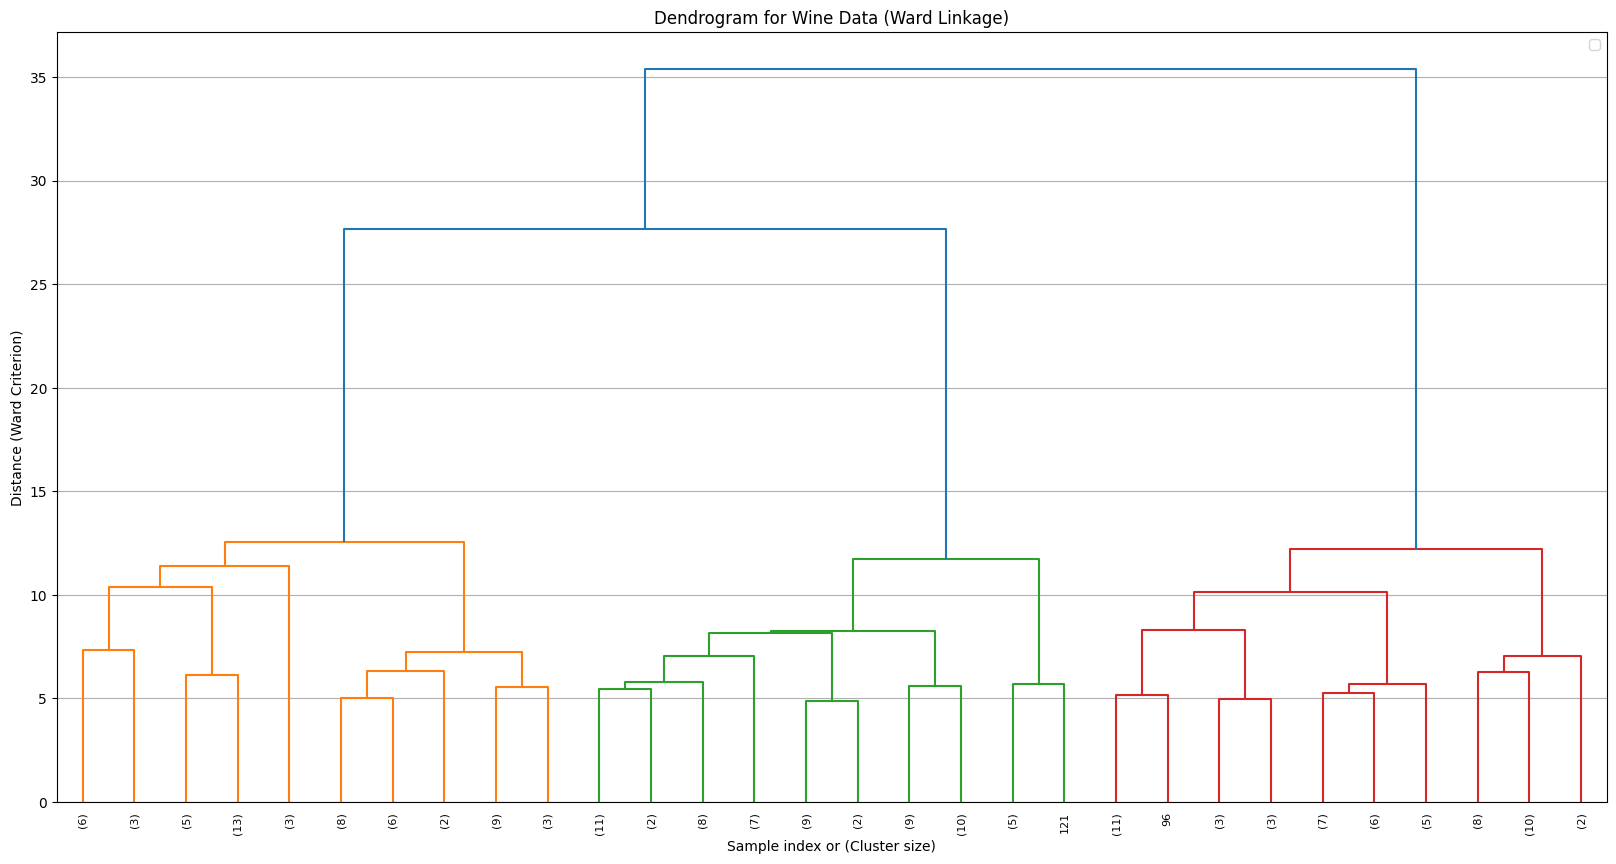

In [14]:
# --- 3. Plotting the Dendrogram (using Ward linkage) ---
# Ward linkage is often a good choice for general-purpose clustering.
print("\n--- Plotting Dendrogram for Wine Data (Ward Linkage) ---")
plt.figure(figsize=(20, 10)) # Larger figure for better dendrogram readability
plt.title("Dendrogram for Wine Data (Ward Linkage)")

linked_matrix_wine = shc.linkage(X_wine_scaled, method='ward')

dendrogram_wine = shc.dendrogram(linked_matrix_wine,
                                 orientation='top',
                                 distance_sort='descending',
                                 show_leaf_counts=True,
                                 truncate_mode='lastp', # Show only the last p merged clusters
                                 p=30, # Show more merged clusters for inspection
                                 leaf_rotation=90.,
                                 leaf_font_size=8.)
plt.xlabel("Sample index or (Cluster size)")
plt.ylabel("Distance (Ward Criterion)")
# Add a horizontal line to suggest a cut (example)
# Try to find the largest vertical jump and cut above it.
# For wine, a cut yielding 3 clusters is often reasonable.
# plt.axhline(y=25, color='r', linestyle='--', label="Example Cut for 3 Clusters (y-value may vary)")
plt.legend()
plt.grid(axis='y')
plt.show()

In [15]:
# Based on the dendrogram, let's assume we decide on 3 clusters,
# which matches the true number of wine cultivars.
n_clusters_wine_chosen = 3
print(f"Based on the Dendrogram (and knowing true classes), choosing K={n_clusters_wine_chosen}")


Based on the Dendrogram (and knowing true classes), choosing K=3


In [16]:
# --- 4. Applying Agglomerative Clustering ---
print(f"\n--- Applying Agglomerative Clustering with K={n_clusters_wine_chosen} (Wine Data) ---")
agg_clustering_wine = AgglomerativeClustering(
    n_clusters=n_clusters_wine_chosen,
    metric='euclidean',
    linkage='ward'
)
cluster_labels_wine = agg_clustering_wine.fit_predict(X_wine_scaled)

# Add cluster labels to the original DataFrame
X_wine_df['Hierarchical_Cluster'] = cluster_labels_wine



--- Applying Agglomerative Clustering with K=3 (Wine Data) ---



--- Visualizing Clusters using PCA (2D projection) for Wine Data ---


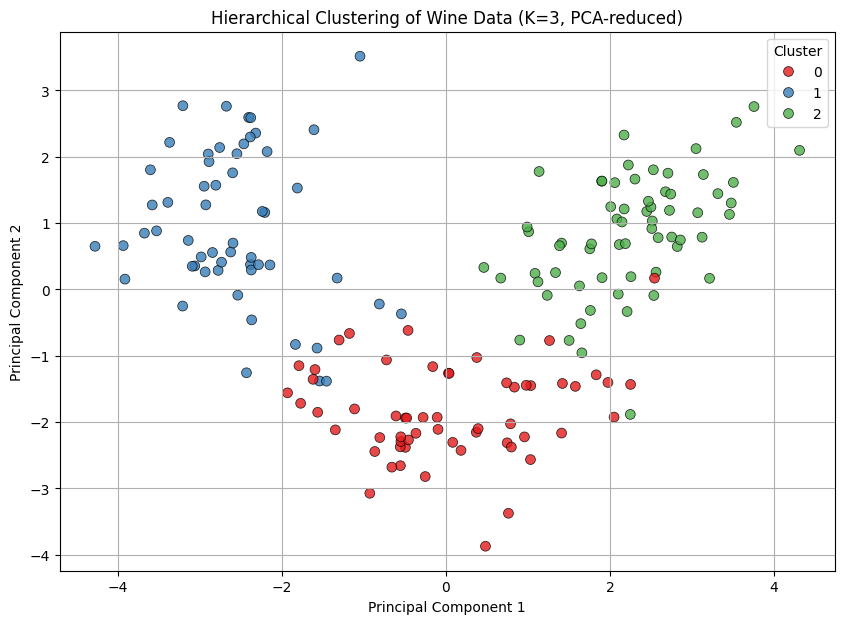

In [17]:
# --- 5. Visualize the Clustering Results (using PCA for 2D projection) ---
print("\n--- Visualizing Clusters using PCA (2D projection) for Wine Data ---")
pca_wine = PCA(n_components=2, random_state=42)
X_wine_pca = pca_wine.fit_transform(X_wine_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_wine_pca[:, 0], y=X_wine_pca[:, 1], hue=cluster_labels_wine,
                palette=sns.color_palette("Set1", n_colors=n_clusters_wine_chosen),
                s=50, alpha=0.8, legend='full', edgecolor='k')

plt.title(f"Hierarchical Clustering of Wine Data (K={n_clusters_wine_chosen}, PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [18]:
# --- 6. Evaluate against true labels (optional, as clustering is unsupervised) ---
from sklearn.metrics import adjusted_rand_score
ari_wine_hc = adjusted_rand_score(y_wine_true, cluster_labels_wine)
print(f"\nAdjusted Rand Index (vs true wine cultivars): {ari_wine_hc:.4f}")
print("(ARI close to 1 means good agreement with true labels, 0 is random)")



Adjusted Rand Index (vs true wine cultivars): 0.7899
(ARI close to 1 means good agreement with true labels, 0 is random)


**Discussion for Wine Dataset Hierarchical Clustering Example:**

- Dendrogram Interpretation: The dendrogram for the Wine dataset (especially with Ward linkage) should hopefully suggest a cut that yields 3 clusters, corresponding to the three true cultivars of wine in the dataset. You'd look for significant vertical distances in the dendrogram to decide where to "cut."
- PCA for Visualization: Since the Wine dataset has 13 features, PCA is used to project the data and the cluster assignments into 2D for visualization. This is an approximation, but it can give a sense of how well the clusters are separated.

- Adjusted Rand Index (ARI): This is an external validation metric used here because we do have the true labels for the Wine dataset. It measures the similarity between the true class assignments and the assignments made by our clustering algorithm. A score close to 1 indicates good agreement. In a purely unsupervised scenario, you wouldn't have true labels and would rely on internal metrics (like Silhouette Score, not explicitly shown here but could be added) or dendrogram interpretation.

- These two examples demonstrate how to perform hierarchical clustering, visualize dendrograms to help choose the number of clusters, and then apply AgglomerativeClustering to get cluster labels. The choice of linkage method is shown to be important.